# Chapter 4: Classification

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## The Stock Market Data

In [2]:
dataset = pd.read_csv('data/Smarket.csv')

In [3]:
dataset.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
dataset.describe()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,625.500000,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,360.988227,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,1.000000,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,313.250000,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,625.500000,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,937.750000,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,1250.000000,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [5]:
X_train = dataset[dataset['Year'] < 2005].iloc[:, 2: -2]
y_train = dataset[dataset['Year'] < 2005].iloc[:, -1]
X_test = dataset[dataset['Year'] == 2005].iloc[:, 2: -2]
y_test = dataset[dataset['Year'] == 2005].iloc[:, -1]

In [6]:
X_train.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.381,-0.192,-2.624,-1.055,5.010,1.1913
1,0.959,0.381,-0.192,-2.624,-1.055,1.2965
2,1.032,0.959,0.381,-0.192,-2.624,1.4112
3,-0.623,1.032,0.959,0.381,-0.192,1.2760
4,0.614,-0.623,1.032,0.959,0.381,1.2057


In [7]:
y_train.head()

0      Up
1      Up
2    Down
3      Up
4      Up
Name: Direction, dtype: object

## Logistic Regression

### Logistic Regression with Scikit-learn

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
classifier.coef_

array([[-0.05423894, -0.04542453,  0.00745773,  0.00675954, -0.00405469,
        -0.09769463]])

In [10]:
classifier.intercept_

array([0.16516961])

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
y_pred[:10]

array(['Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up'],
      dtype=object)

In [13]:
from sklearn.metrics import confusion_matrix
labels = y_test.unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_df = pd.DataFrame(cm, columns=labels, index=labels)

In [14]:
cm_df

,Down,Up
Down,71,40
Up,89,52


In [30]:
print('Accuracy: {}%'.format((cm[0][0] + cm[1][1]) * 100 / np.sum(cm)))

Accuracy: 48.80952380952381%


### Logistic Regression with Statsmodel

In [15]:
y_train_encoded = y_train.copy()

In [16]:
y_train_encoded[y_train_encoded == 'Up'] = 1
y_train_encoded[y_train_encoded == 'Down'] = 0
y_train_encoded = y_train_encoded.astype('int')

In [17]:
y_train_encoded

0      1
1      1
2      0
3      1
4      1
      ..
993    0
994    1
995    0
996    1
997    0
Name: Direction, Length: 998, dtype: int64

In [18]:
import statsmodels.api as sm
res = sm.Logit(endog=y_train_encoded, exog=sm.tools.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Tue, 01 Oct 2019   Pseudo R-squ.:                0.001562
Time:                        17:40:14   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
Covariance Type:            nonrobust   LLR p-value:                    0.9044
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1912      0.334      0.573      0.567      -0.463       0.845
Lag1          -0.0542      0.052     -1.046      0.295      -0.156       0.047
Lag2          -0.0458      0.052     -0.884      0.377      -0.147       0.056
Lag3           0.0072      0.052      0.139      0.889      -0.094       0.108
Lag4           0.0064      0.052      0.125      0.901      -0.095       0.108
Lag5          -0.0042      0.051     -0.083      0.934      -0.104       0.096
Volume        -0.1163      0.240     -0.485      0.628      -0.586       0.353
==============================================================================
"""

In [21]:
y_pred_2 = res.predict(sm.tools.add_constant(X_test))

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [22]:
y_pred_2[:10]

998     0.528220
999     0.515669
1000    0.522652
1001    0.513854
1002    0.498334
1003    0.501091
1004    0.502770
1005    0.509568
1006    0.504011
1007    0.510641
dtype: float64

In [23]:
#y_pred_2 = y_pred_2.astype('object')
y_pred_2[y_pred_2 >= 0.5] = 'Up'
y_pred_2[y_pred_2 != 'Up'] = 'Down'

In [24]:
y_pred_2[:10]

998       Up
999       Up
1000      Up
1001      Up
1002    Down
1003      Up
1004      Up
1005      Up
1006      Up
1007      Up
dtype: object

In [25]:
cm_2 = confusion_matrix(y_test, y_pred_2, labels=labels)
cm_df_2 = pd.DataFrame(cm_2, columns=labels, index=labels)

In [26]:
cm_df_2

,Down,Up
Down,77,34
Up,97,44


In [29]:
print('Accuracy: {}%'.format((cm_2[0][0] + cm_2[1][1]) * 100 / np.sum(cm_2)))

Accuracy: 48.01587301587302%


## Linear Discriminant Analysis

In [31]:
X_train[['Lag1', 'Lag2']].head()

,Lag1,Lag2
0,0.381,-0.192
1,0.959,0.381
2,1.032,0.959
3,-0.623,1.032
4,0.614,-0.623


In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train[['Lag1', 'Lag2']], y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [33]:
lda.coef_

array([[-0.05544078, -0.0443452 ]])

In [34]:
lda.priors_

array([0.49198397, 0.50801603])

In [35]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [36]:
y_pred_3 = lda.predict(X_test[['Lag1', 'Lag2']])

In [37]:
y_pred_3[:10]

array(['Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up'],
      dtype='<U4')

In [38]:
cm_3 = confusion_matrix(y_test, y_pred_3, labels=labels)
cm_df_3 = pd.DataFrame(cm, columns=labels, index=labels)

In [39]:
cm_df_3

,Down,Up
Down,71,40
Up,89,52


In [40]:
print('Accuracy: {}%'.format((cm_3[0][0] + cm_3[1][1]) * 100 / np.sum(cm_3)))

Accuracy: 55.95238095238095%


In [41]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set = X_test[['Lag1', 'Lag2']].values
y_set = y_test.copy()

y_set[y_set == 'Up'] = 1
y_set[y_set == 'Down'] = 0
y_set = y_set.astype('int')

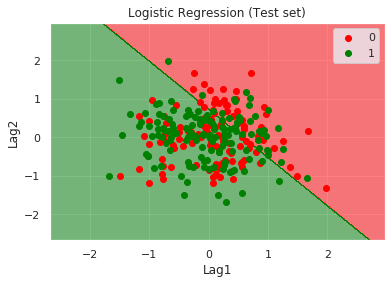

In [42]:
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, step = 0.01))

l = lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
l[l == 'Up'] = 1
l[l == 'Down'] = 0
l = l.astype('int')
plt.contourf(X1, X2, l,
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Lag1')
plt.ylabel('Lag2')
plt.legend()
plt.show();

## Quadratic Discriminant Analysis

In [43]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train[['Lag1', 'Lag2']], y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [44]:
qda.priors_

array([0.49198397, 0.50801603])

In [45]:
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [46]:
y_pred_4 = qda.predict(X_test[['Lag1', 'Lag2']])

In [47]:
y_pred_4[:10]

array(['Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up'],
      dtype=object)

In [48]:
cm_4 = confusion_matrix(y_test, y_pred_4, labels=labels)
cm_df_4 = pd.DataFrame(cm, columns=labels, index=labels)

In [49]:
cm_df_4

,Down,Up
Down,71,40
Up,89,52


In [50]:
print('Accuracy: {}%'.format((cm_4[0][0] + cm_4[1][1]) * 100 / np.sum(cm_4)))

Accuracy: 59.92063492063492%


In [51]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set = X_test[['Lag1', 'Lag2']].values
y_set = y_test.copy()

y_set[y_set == 'Up'] = 1
y_set[y_set == 'Down'] = 0
y_set = y_set.astype('int')

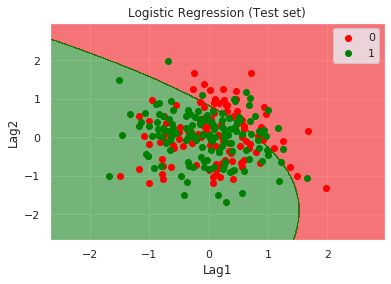

In [52]:
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, step = 0.01))

l = qda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
l[l == 'Up'] = 1
l[l == 'Down'] = 0
l = l.astype('int')
plt.contourf(X1, X2, l,
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Lag1')
plt.ylabel('Lag2')
plt.legend()
plt.show();

## K-Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train[['Lag1', 'Lag2']], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [54]:
y_pred_5 = knn.predict(X_test[['Lag1', 'Lag2']])

In [55]:
y_pred_5[:10]

array(['Up', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Down', 'Down',
       'Up'], dtype=object)

In [56]:
cm_5 = confusion_matrix(y_test, y_pred_5, labels=labels)
cm_df_5 = pd.DataFrame(cm, columns=labels, index=labels)

In [57]:
cm_df_5

,Down,Up
Down,71,40
Up,89,52


In [58]:
print('Accuracy: {}%'.format((cm_5[0][0] + cm_5[1][1]) * 100 / np.sum(cm_5)))

Accuracy: 50.0%


In [59]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set = X_test[['Lag1', 'Lag2']].values
y_set = y_test.copy()

y_set[y_set == 'Up'] = 1
y_set[y_set == 'Down'] = 0
y_set = y_set.astype('int')

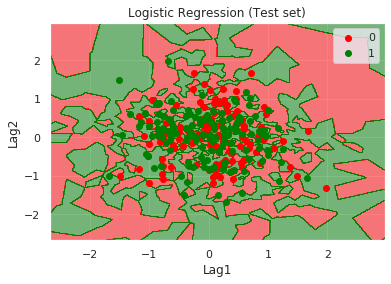

In [61]:
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, step = 0.01))

l = knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
l[l == 'Up'] = 1
l[l == 'Down'] = 0
l = l.astype('int')
plt.contourf(X1, X2, l,
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Lag1')
plt.ylabel('Lag2')
plt.legend()
plt.show();